<a href="https://colab.research.google.com/github/kuldeepthakare7/Chirp-Birdsong-recognition/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv('/food_coded.csv')

In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          124 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [ ]:
new_df  = df.isnull().sum() #This is created to find the column with maximum null values.

In [ ]:
new_df

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [ ]:
new_df.sort_values(ascending=False) # Columns with maximum frequency of nulls.

type_sports                     21
calories_day                    19
comfort_food_reasons_coded      19
cuisine                         17
exercise                        13
                                ..
comfort_food_reasons_coded.1     0
diet_current_coded               0
ethnic_food                      0
eating_out                       0
fruit_day                        0
Length: 61, dtype: int64

In [ ]:
df.drop('type_sports',inplace=True,axis=1)

In [ ]:
ts_mean = df['calories_day'].mean()

In [ ]:
df['calories_day'] = df['calories_day'].fillna(ts_mean)

In [ ]:
df['calories_day'].isnull().sum()

0

In [ ]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,125.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.588294,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.028302,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [ ]:
df.drop('comfort_food',inplace=True,axis=1)

In [ ]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons,comfort_food_reasons_coded,cook,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.028302,315.0,1,we dont have comfort,9.0,2.0,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.000000,420.0,2,"Stress, bored, anger",1.0,3.0,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,4.000000,420.0,2,"stress, sadness",1.0,1.0,...,6.0,1.0,2.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.000000,420.0,2,Boredom,2.0,2.0,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.000000,420.0,2,"Stress, boredom, cravings",1.0,1.0,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190


In [ ]:
df.shape

(125, 59)

In [ ]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calori

In [ ]:
df['GPA'].isnull().sum() # how many values are null in GPA

2

In [ ]:
  df['GPA'] = pd.to_numeric(df.GPA, errors='coerce') # converting GPA to float from object to calculate the mean

In [ ]:
df['GPA'].mean()

3.4155583333333337

In [ ]:
df['GPA'] = df['GPA'].fillna(df['GPA'].mean()) # replacing the null values with mean

In [ ]:
df['GPA'].isnull().sum()

0

In [ ]:
df['GPA']

0      2.400
1      3.654
2      3.300
3      3.200
4      3.500
       ...  
120    3.500
121    3.000
122    3.882
123    3.000
124    3.900
Name: GPA, Length: 125, dtype: float64

In [ ]:
df['calories_chicken'].unique()

array([430, 610, 720, 265])

In [ ]:
df['calories_scone'].isnull().sum()

1

In [ ]:
df['calories_scone'] = df['calories_scone'].fillna(df['calories_scone'].mean()) # replacing null values in calorie chicken with mean

In [ ]:
df['calories_tot'] = df['calories_chicken']+df['calories_scone'] # creating new column which incidates the total calories taken

In [ ]:
df['calories_tot']

0       745.0
1      1030.0
2      1140.0
3       850.0
4      1140.0
        ...  
120    1030.0
121     580.0
122    1140.0
123    1140.0
124     745.0
Name: calories_tot, Length: 125, dtype: float64

In [ ]:
df['calories_tot'].unique()

array([ 745.        , 1030.        , 1140.        ,  850.        ,
       1590.        , 1410.        ,  685.        , 1700.        ,
        925.        , 1035.        ,  580.        , 1115.24193548,
       1245.        ])

<Axes: xlabel='calories_chicken', ylabel='GPA'>

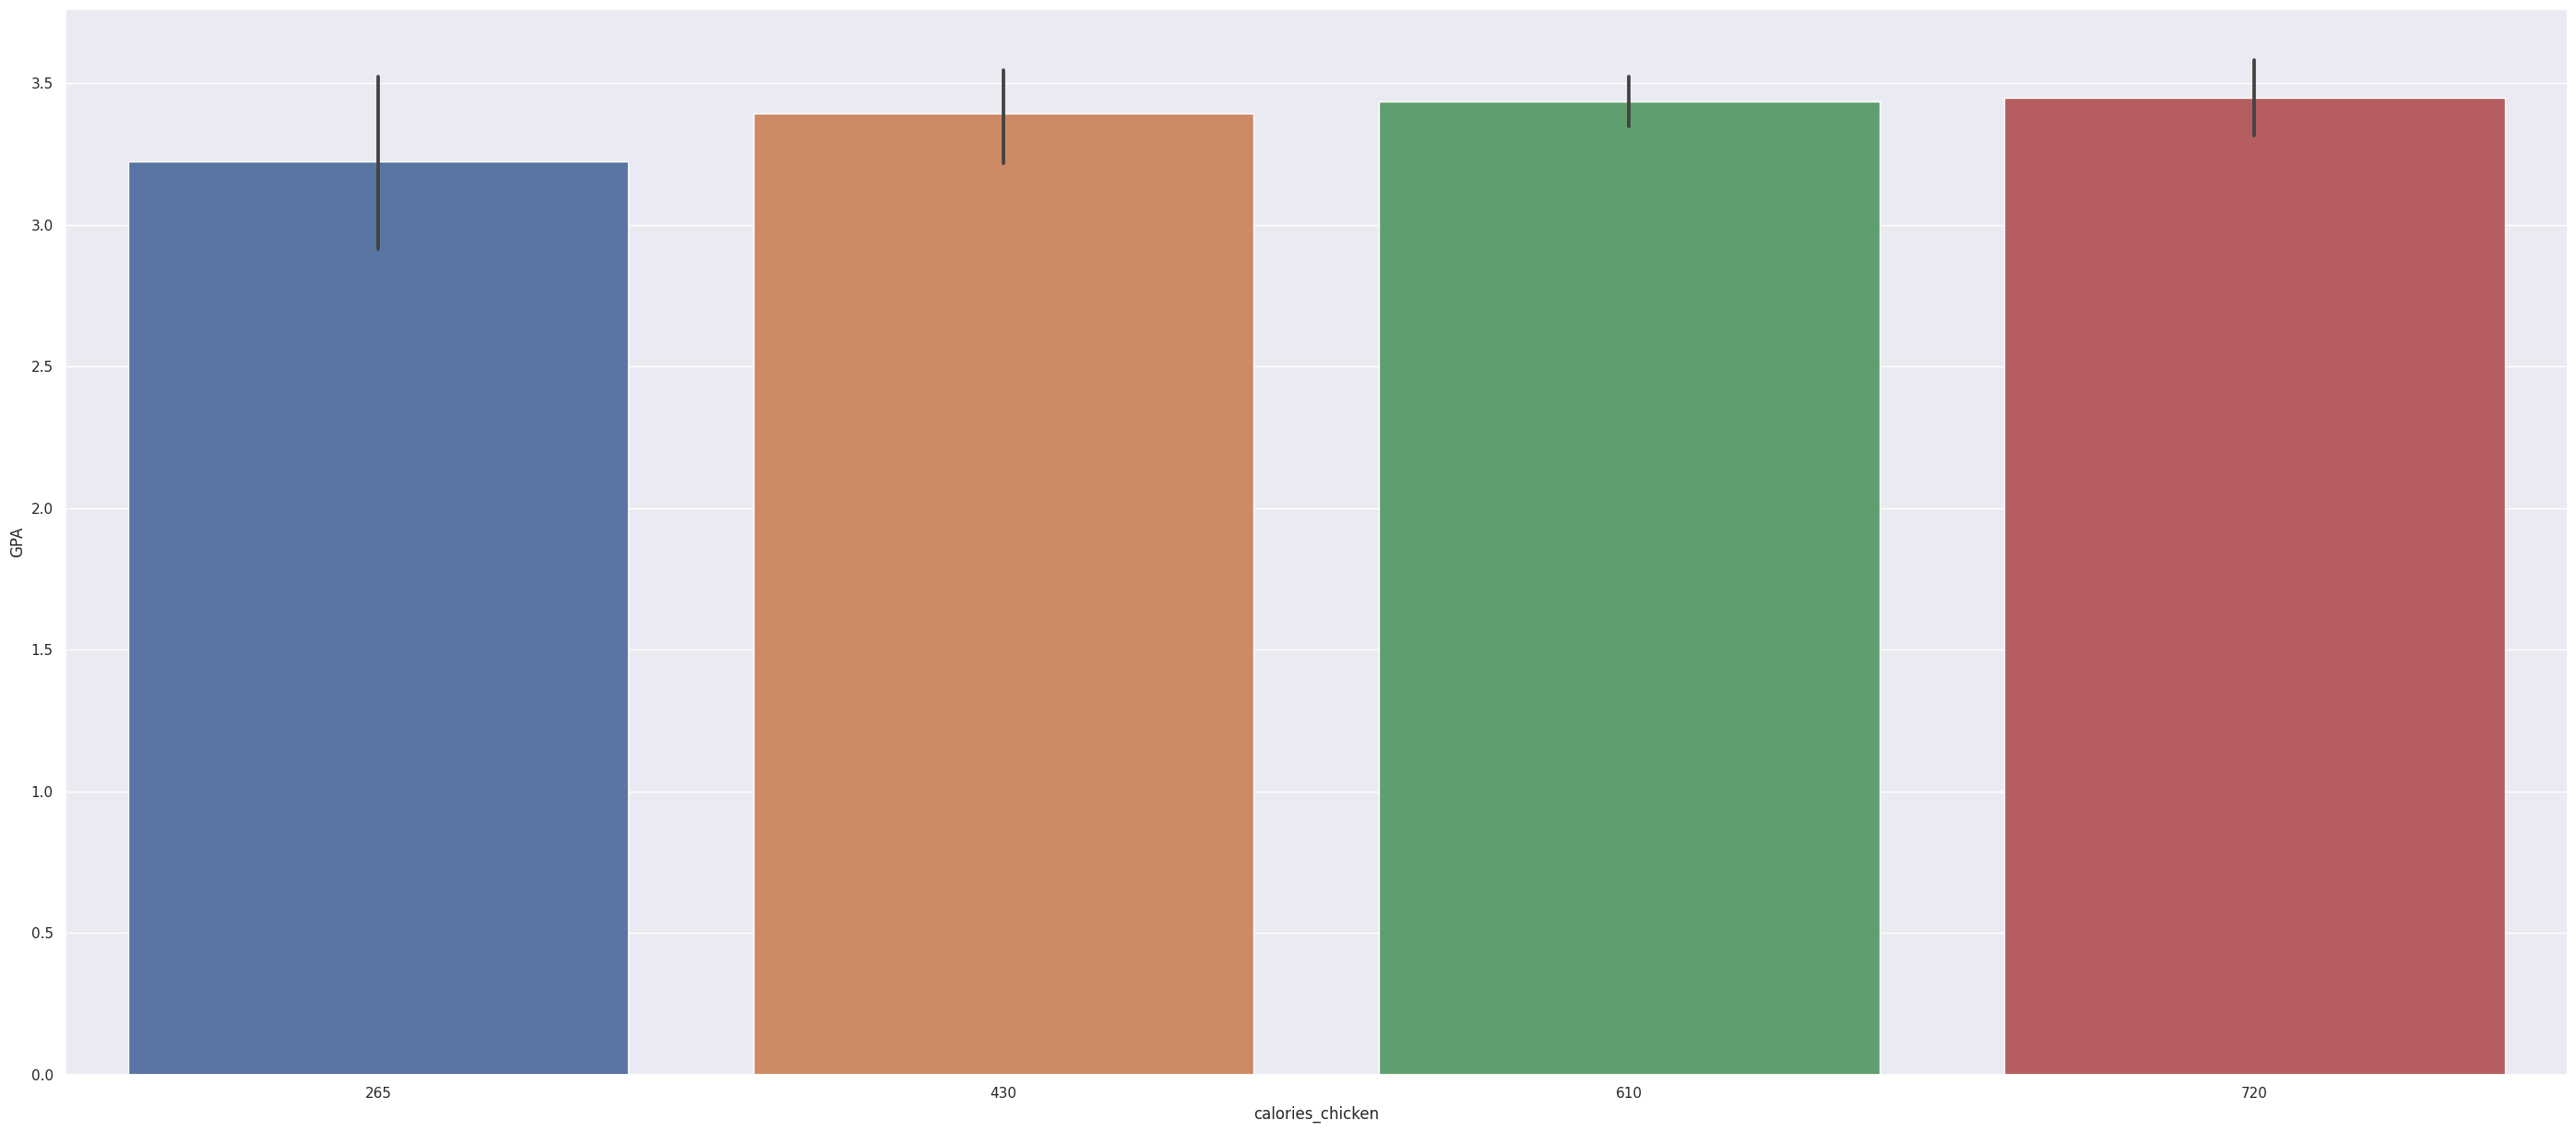

In [ ]:
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(data = df,x='calories_chicken',y='GPA')

<Axes: xlabel='calories_scone', ylabel='GPA'>

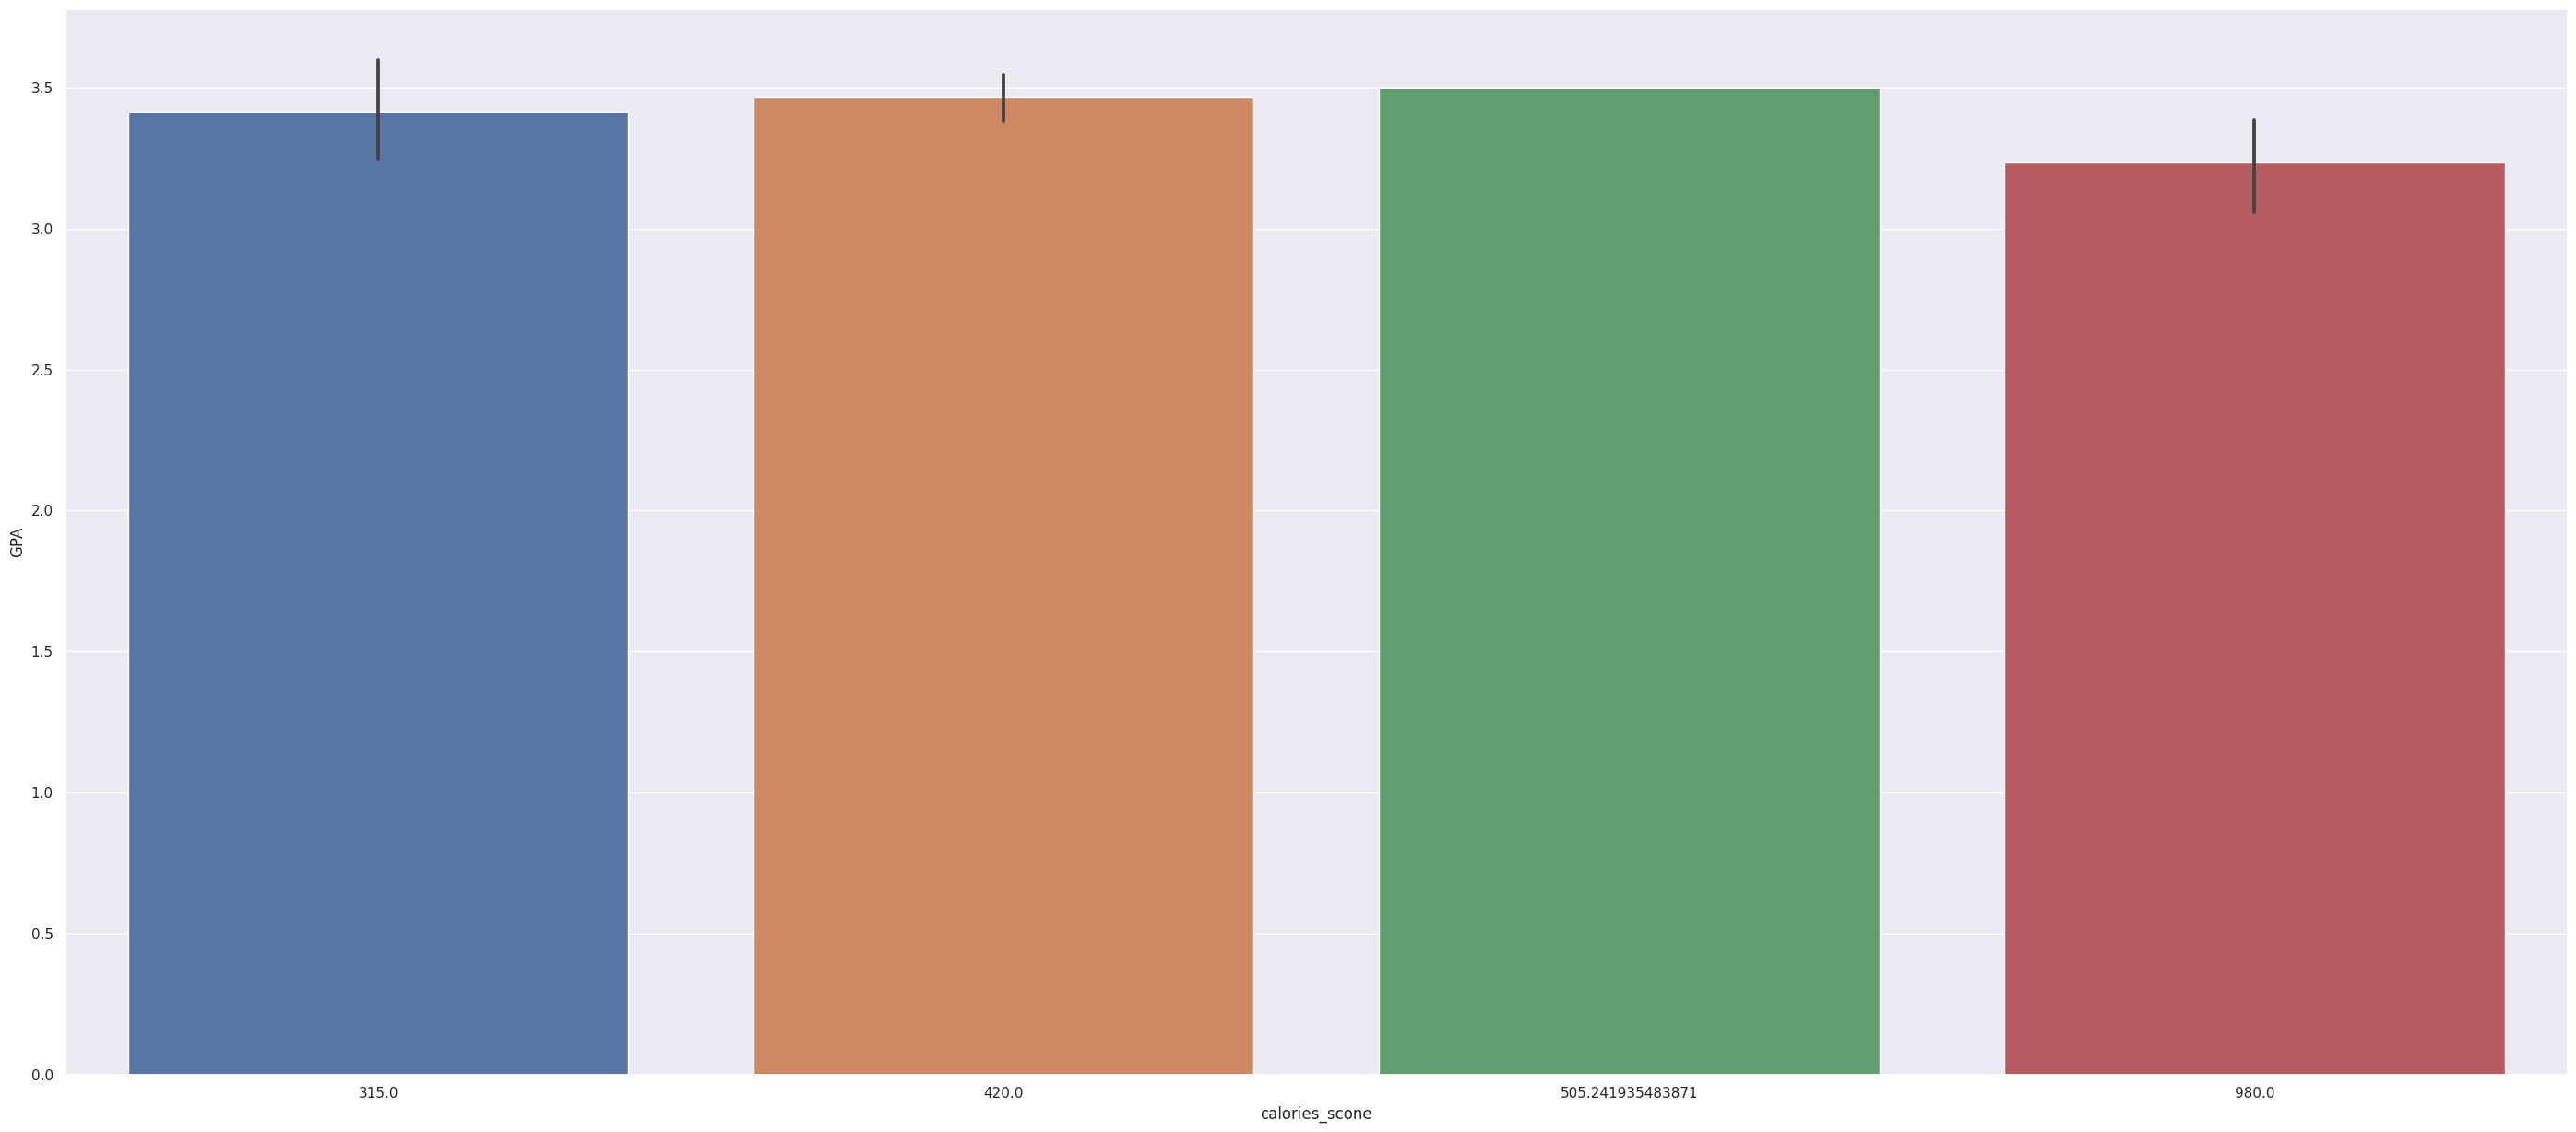

In [ ]:
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(data = df,x='calories_scone',y='GPA')

<Axes: xlabel='calories_tot', ylabel='GPA'>

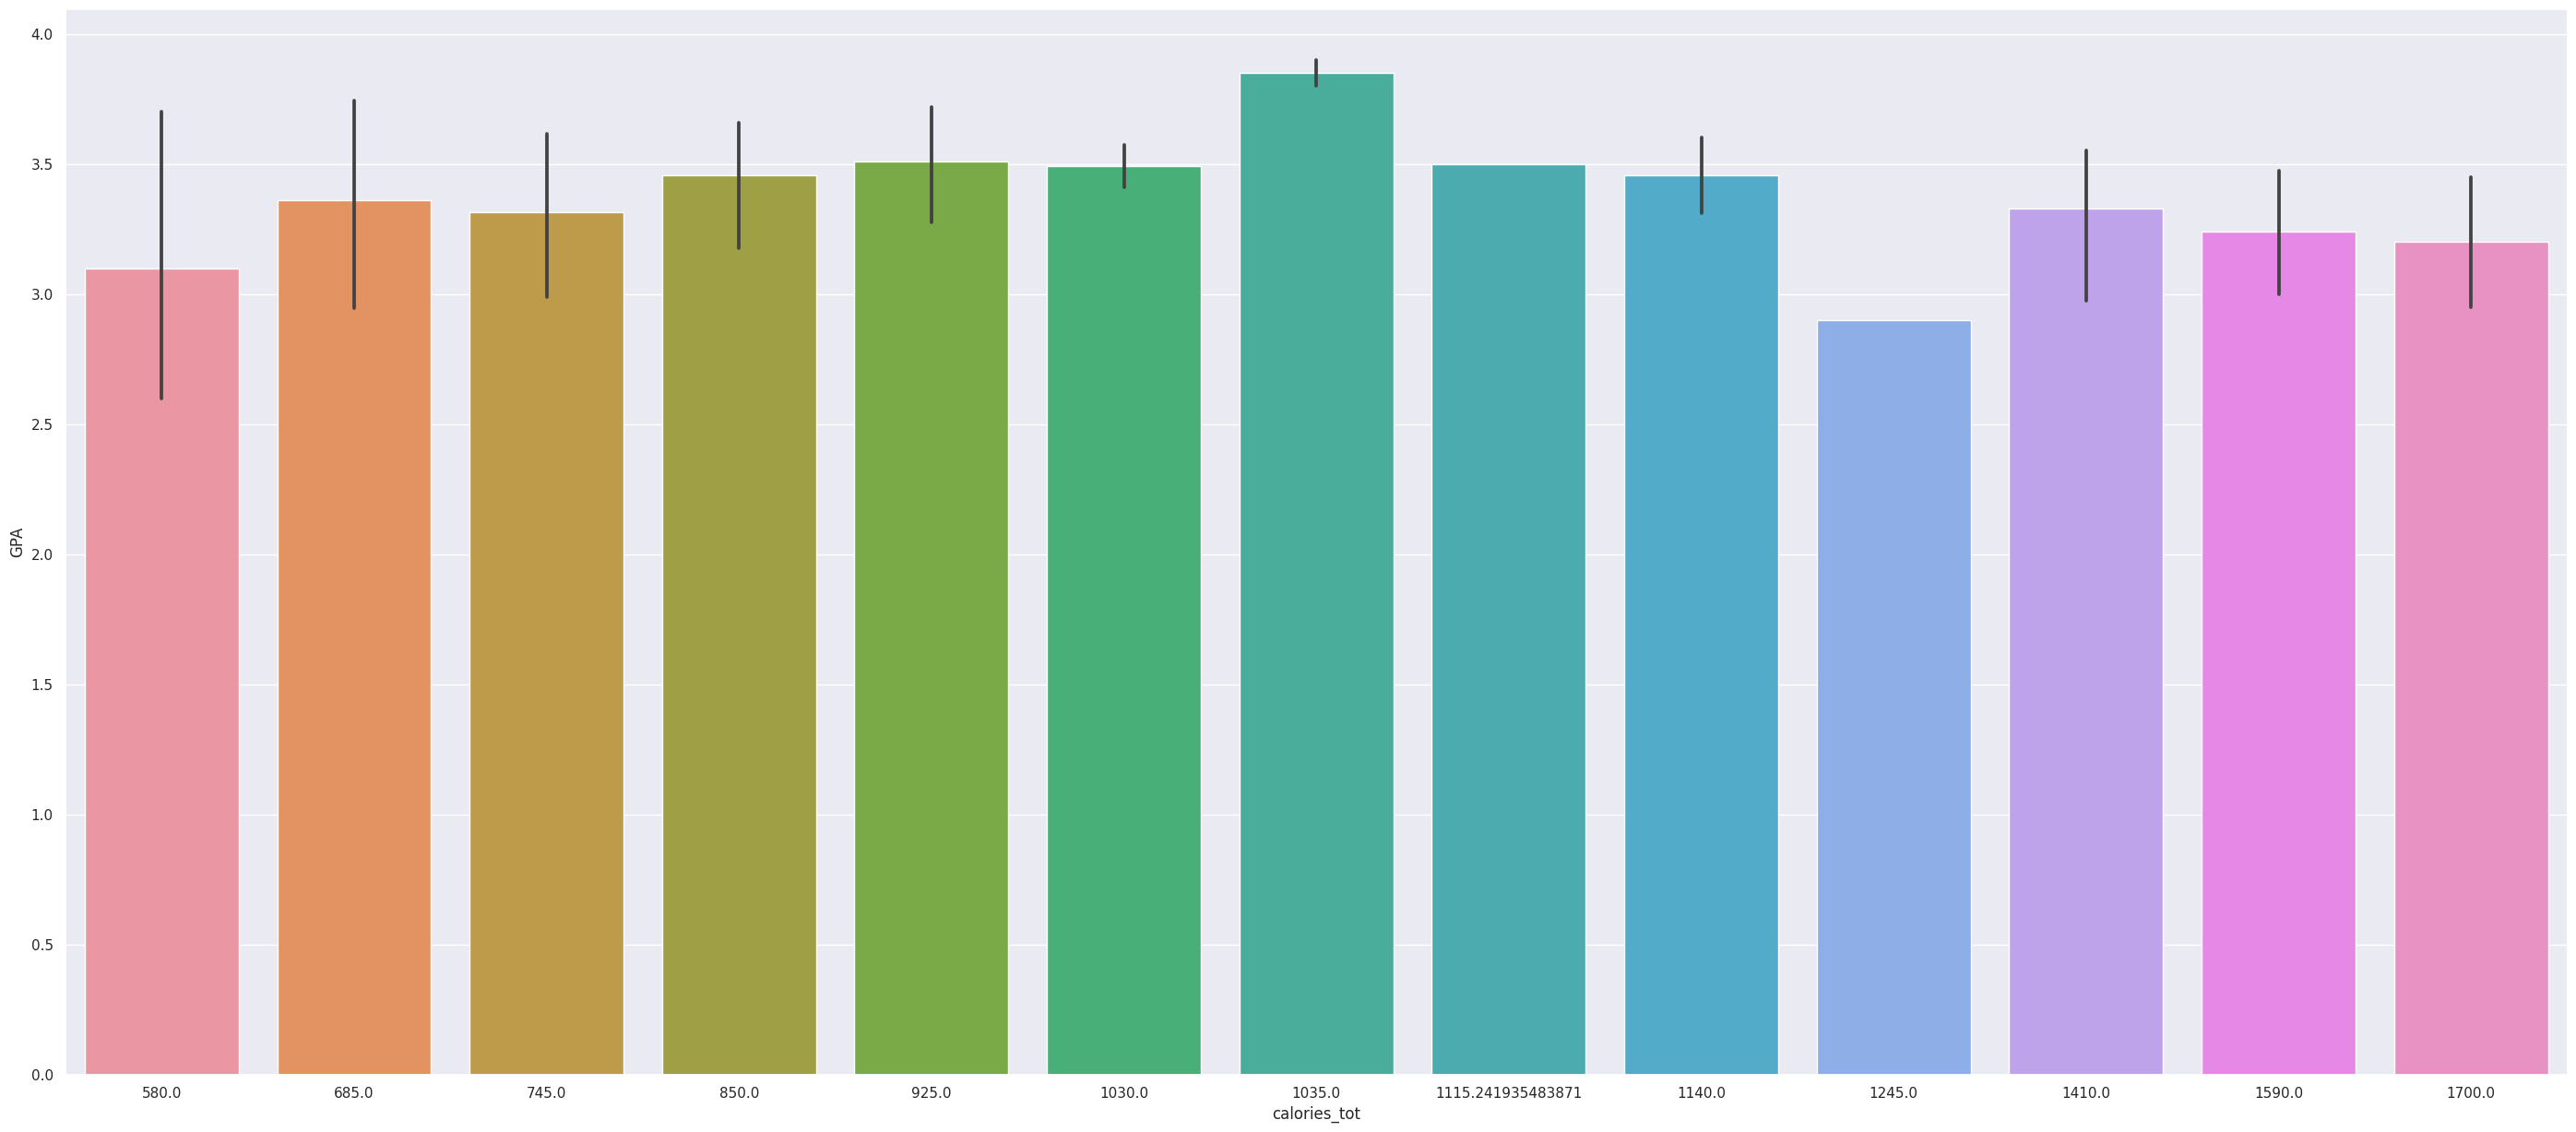

In [ ]:
#How calories affect gpa (here we see more calorie intake makes av.GPA higher)
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(data = df,x='calories_tot',y='GPA')

From the above three graphs we see that calorie_chicken has more contribution to GPA means more its taken its more beneficial on the other hand scone is dangerous for GPA more consumption has effects on the GPA

<Axes: xlabel='Gender', ylabel='GPA'>

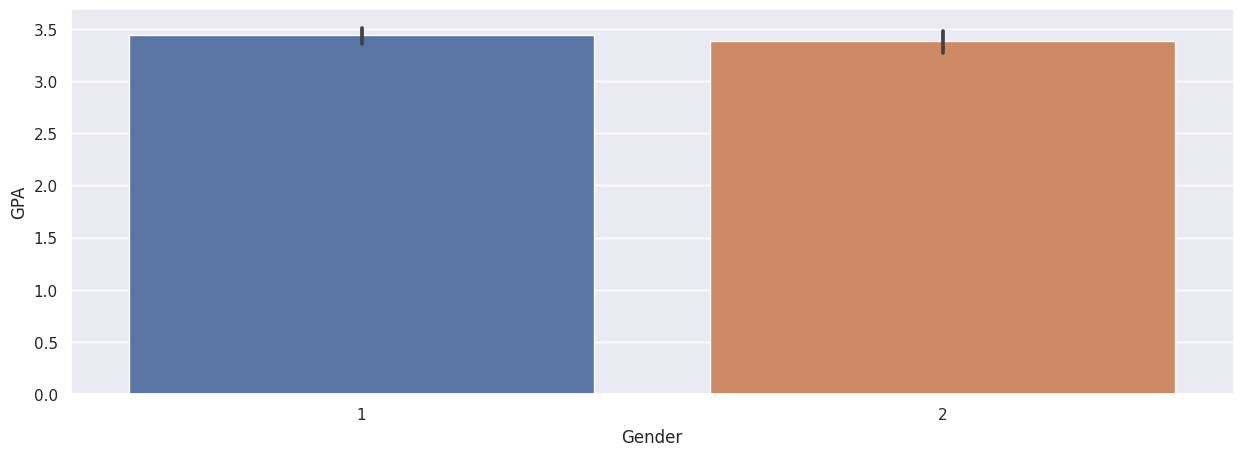

In [ ]:
# Now we look at GPA of specific gender 2 has less GPA than 1 on an average
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = df,x='Gender',y='GPA')

<Axes: xlabel='Gender', ylabel='calories_chicken'>

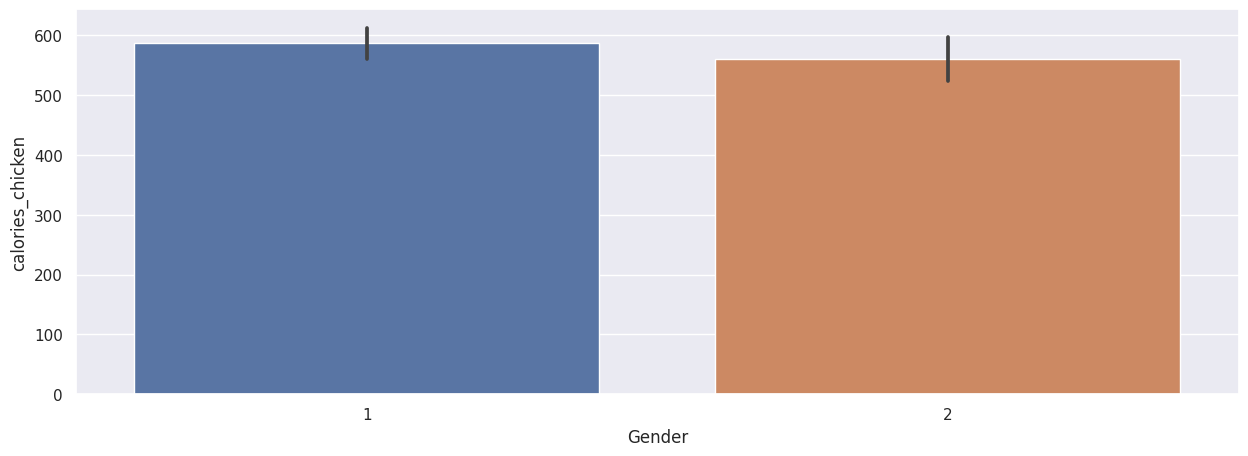

In [ ]:
# lets look at calorie intake of gender 1 and 2
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = df,x='Gender',y='calories_chicken')

<Axes: xlabel='Gender', ylabel='calories_scone'>

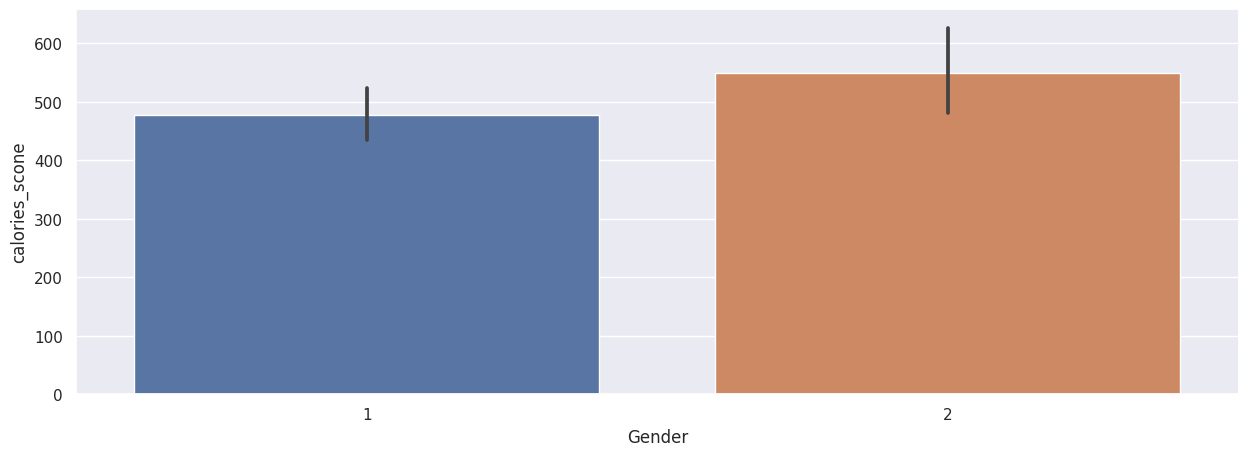

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = df,x='Gender',y='calories_scone')

Here we arrive at an observation that Gender 2 has less calories_chicken intake than gneder 1 but has more ascone intake than gender 1 so it directly affects the average GPA. So we arrive at the conclusion that scone is harmful for one's brain.


In [ ]:
df['weight'].isnull().sum()

2

In [ ]:
df['weight']

0                           187
1                           155
2      I'm not answering this. 
3                 Not sure, 240
4                           190
                 ...           
120                         156
121                         180
122                         120
123                         135
124                         135
Name: weight, Length: 125, dtype: object

In [ ]:
df['weight'] = pd.to_numeric(df.weight, errors='coerce') # converting the object data type to float for taking mean

In [ ]:
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['weight']

0      187.0
1      155.0
2      158.5
3      158.5
4      190.0
       ...  
120    156.0
121    180.0
122    120.0
123    135.0
124    135.0
Name: weight, Length: 125, dtype: float64

<Axes: xlabel='weight', ylabel='calories_scone'>

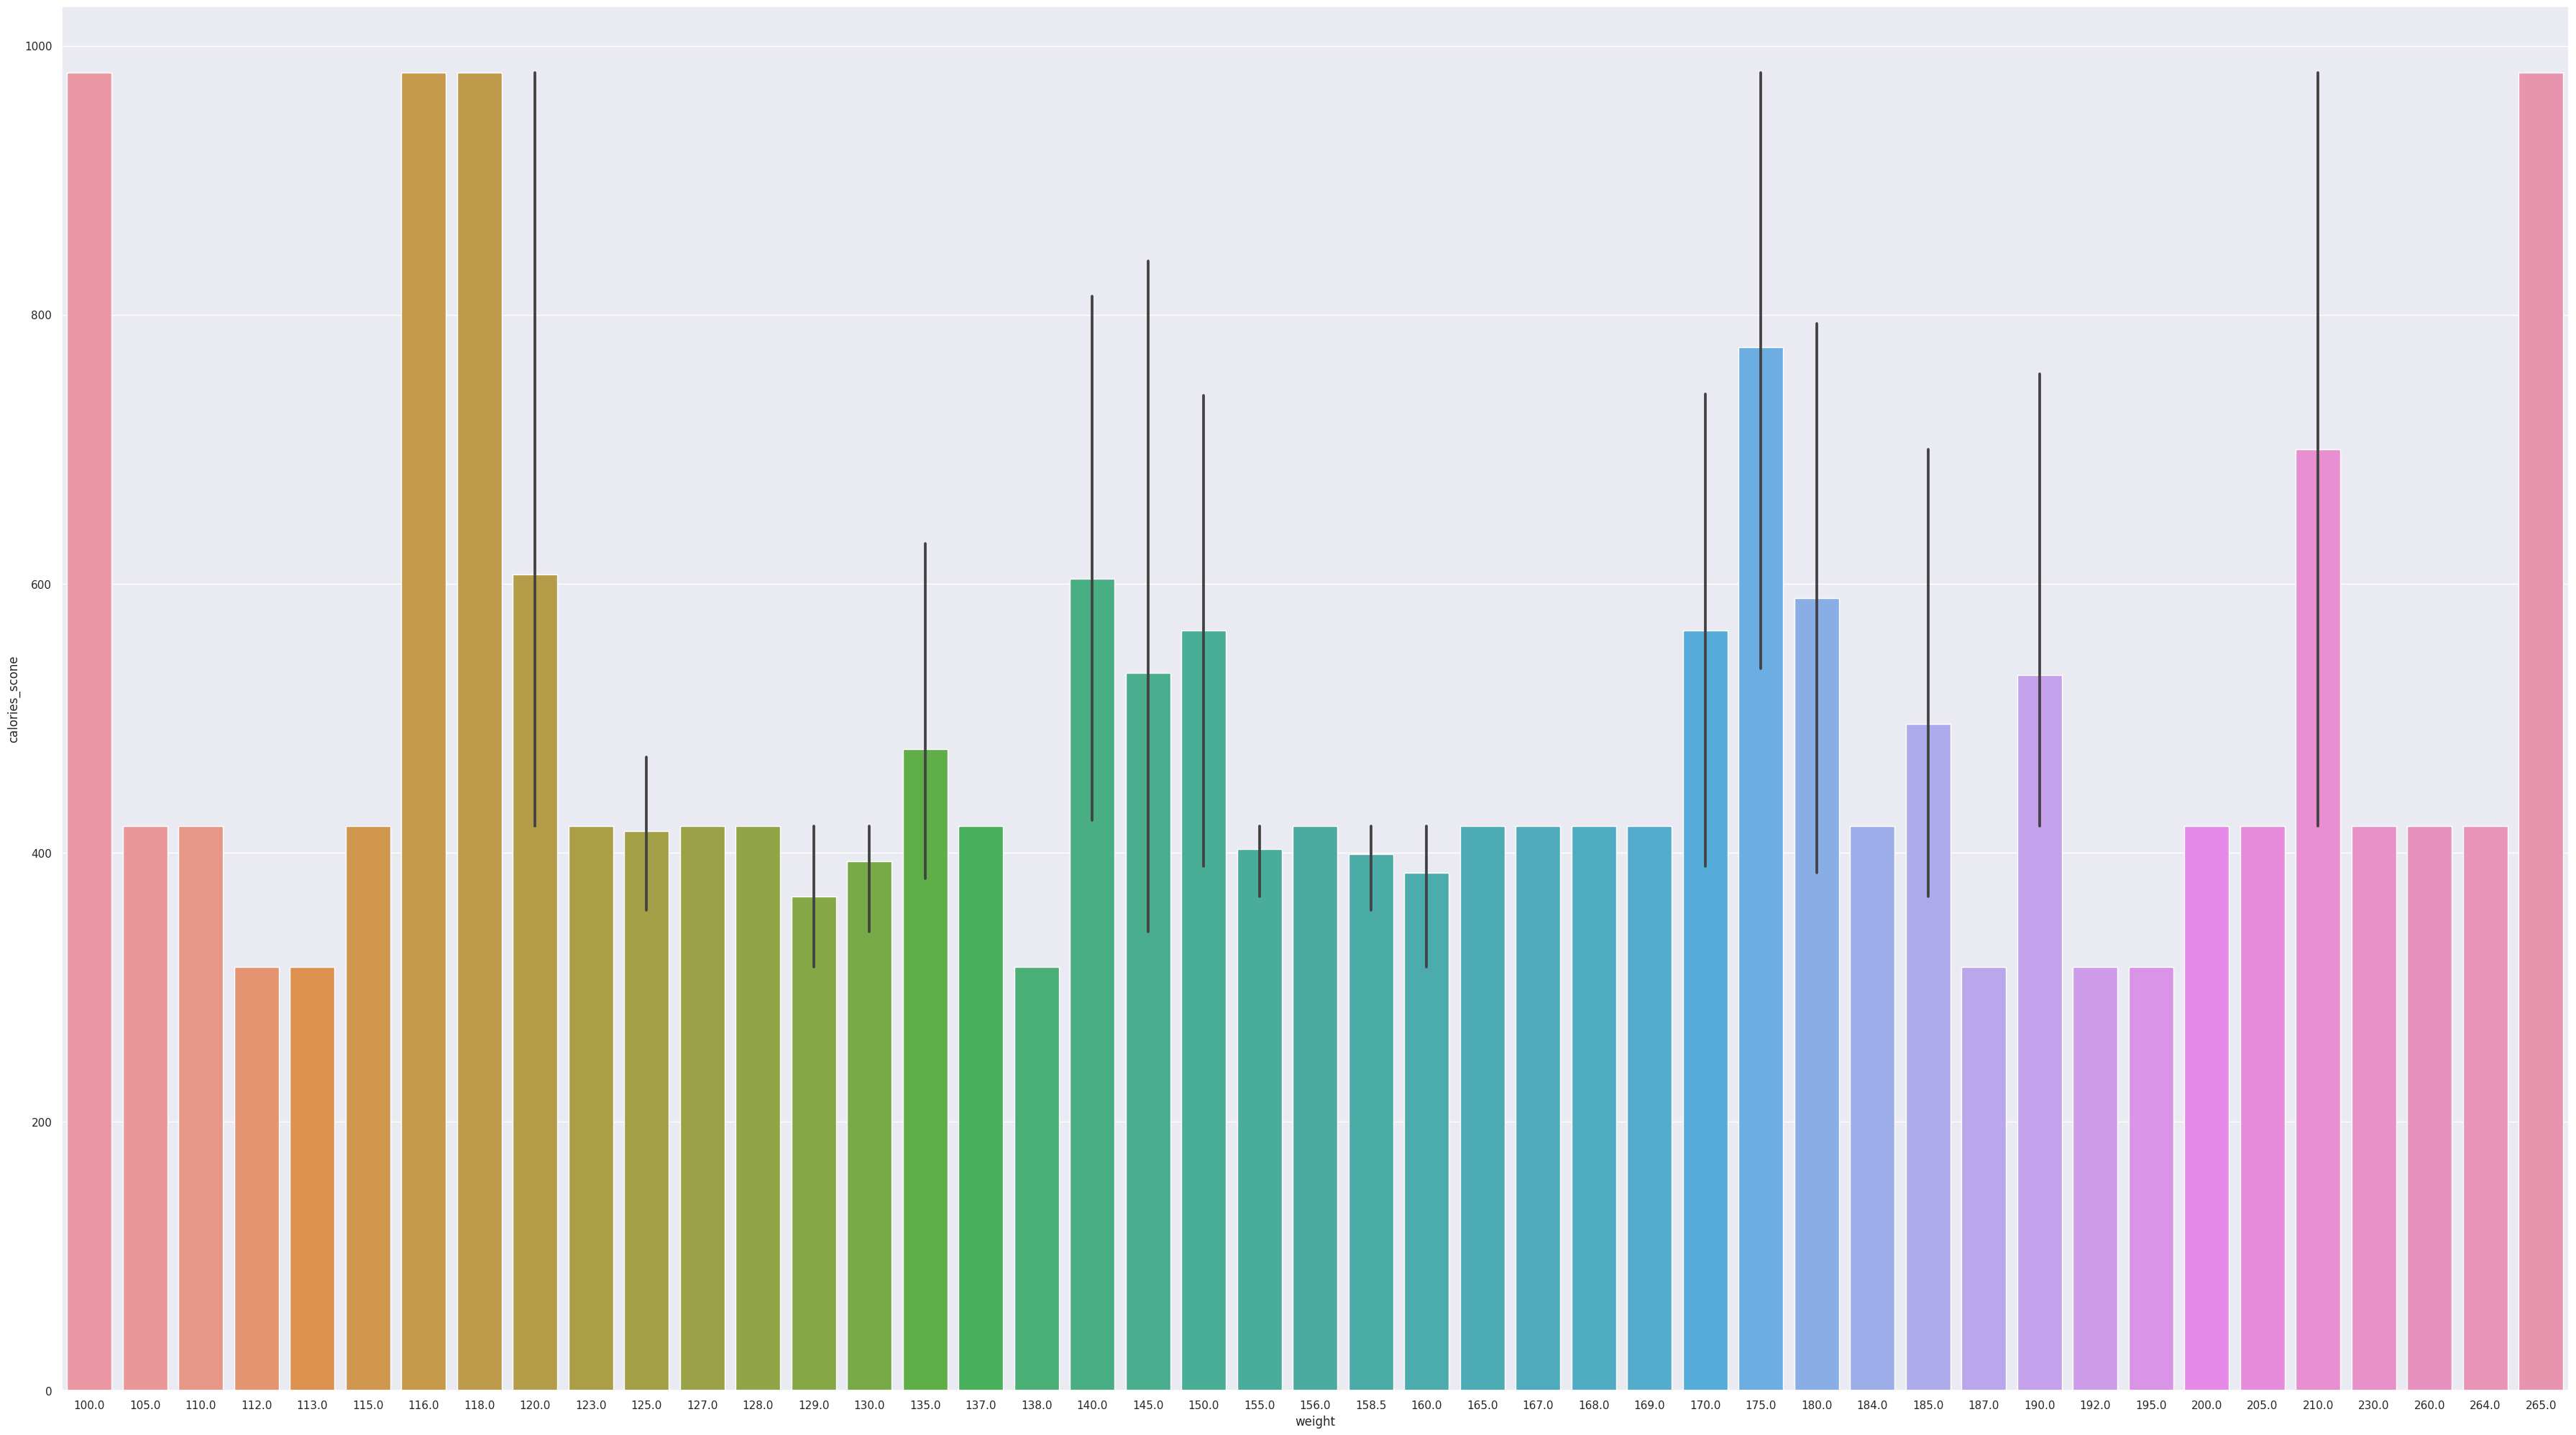

In [ ]:
Sorted_weights = df.sort_values(by='weight')
sns.set(rc={'figure.figsize':(45,25)})
sns.barplot(data = Sorted_weights,x='weight',y='calories_scone')

Here we see that weight has no relation wth calories

<Axes: xlabel='weight', ylabel='calories_chicken'>

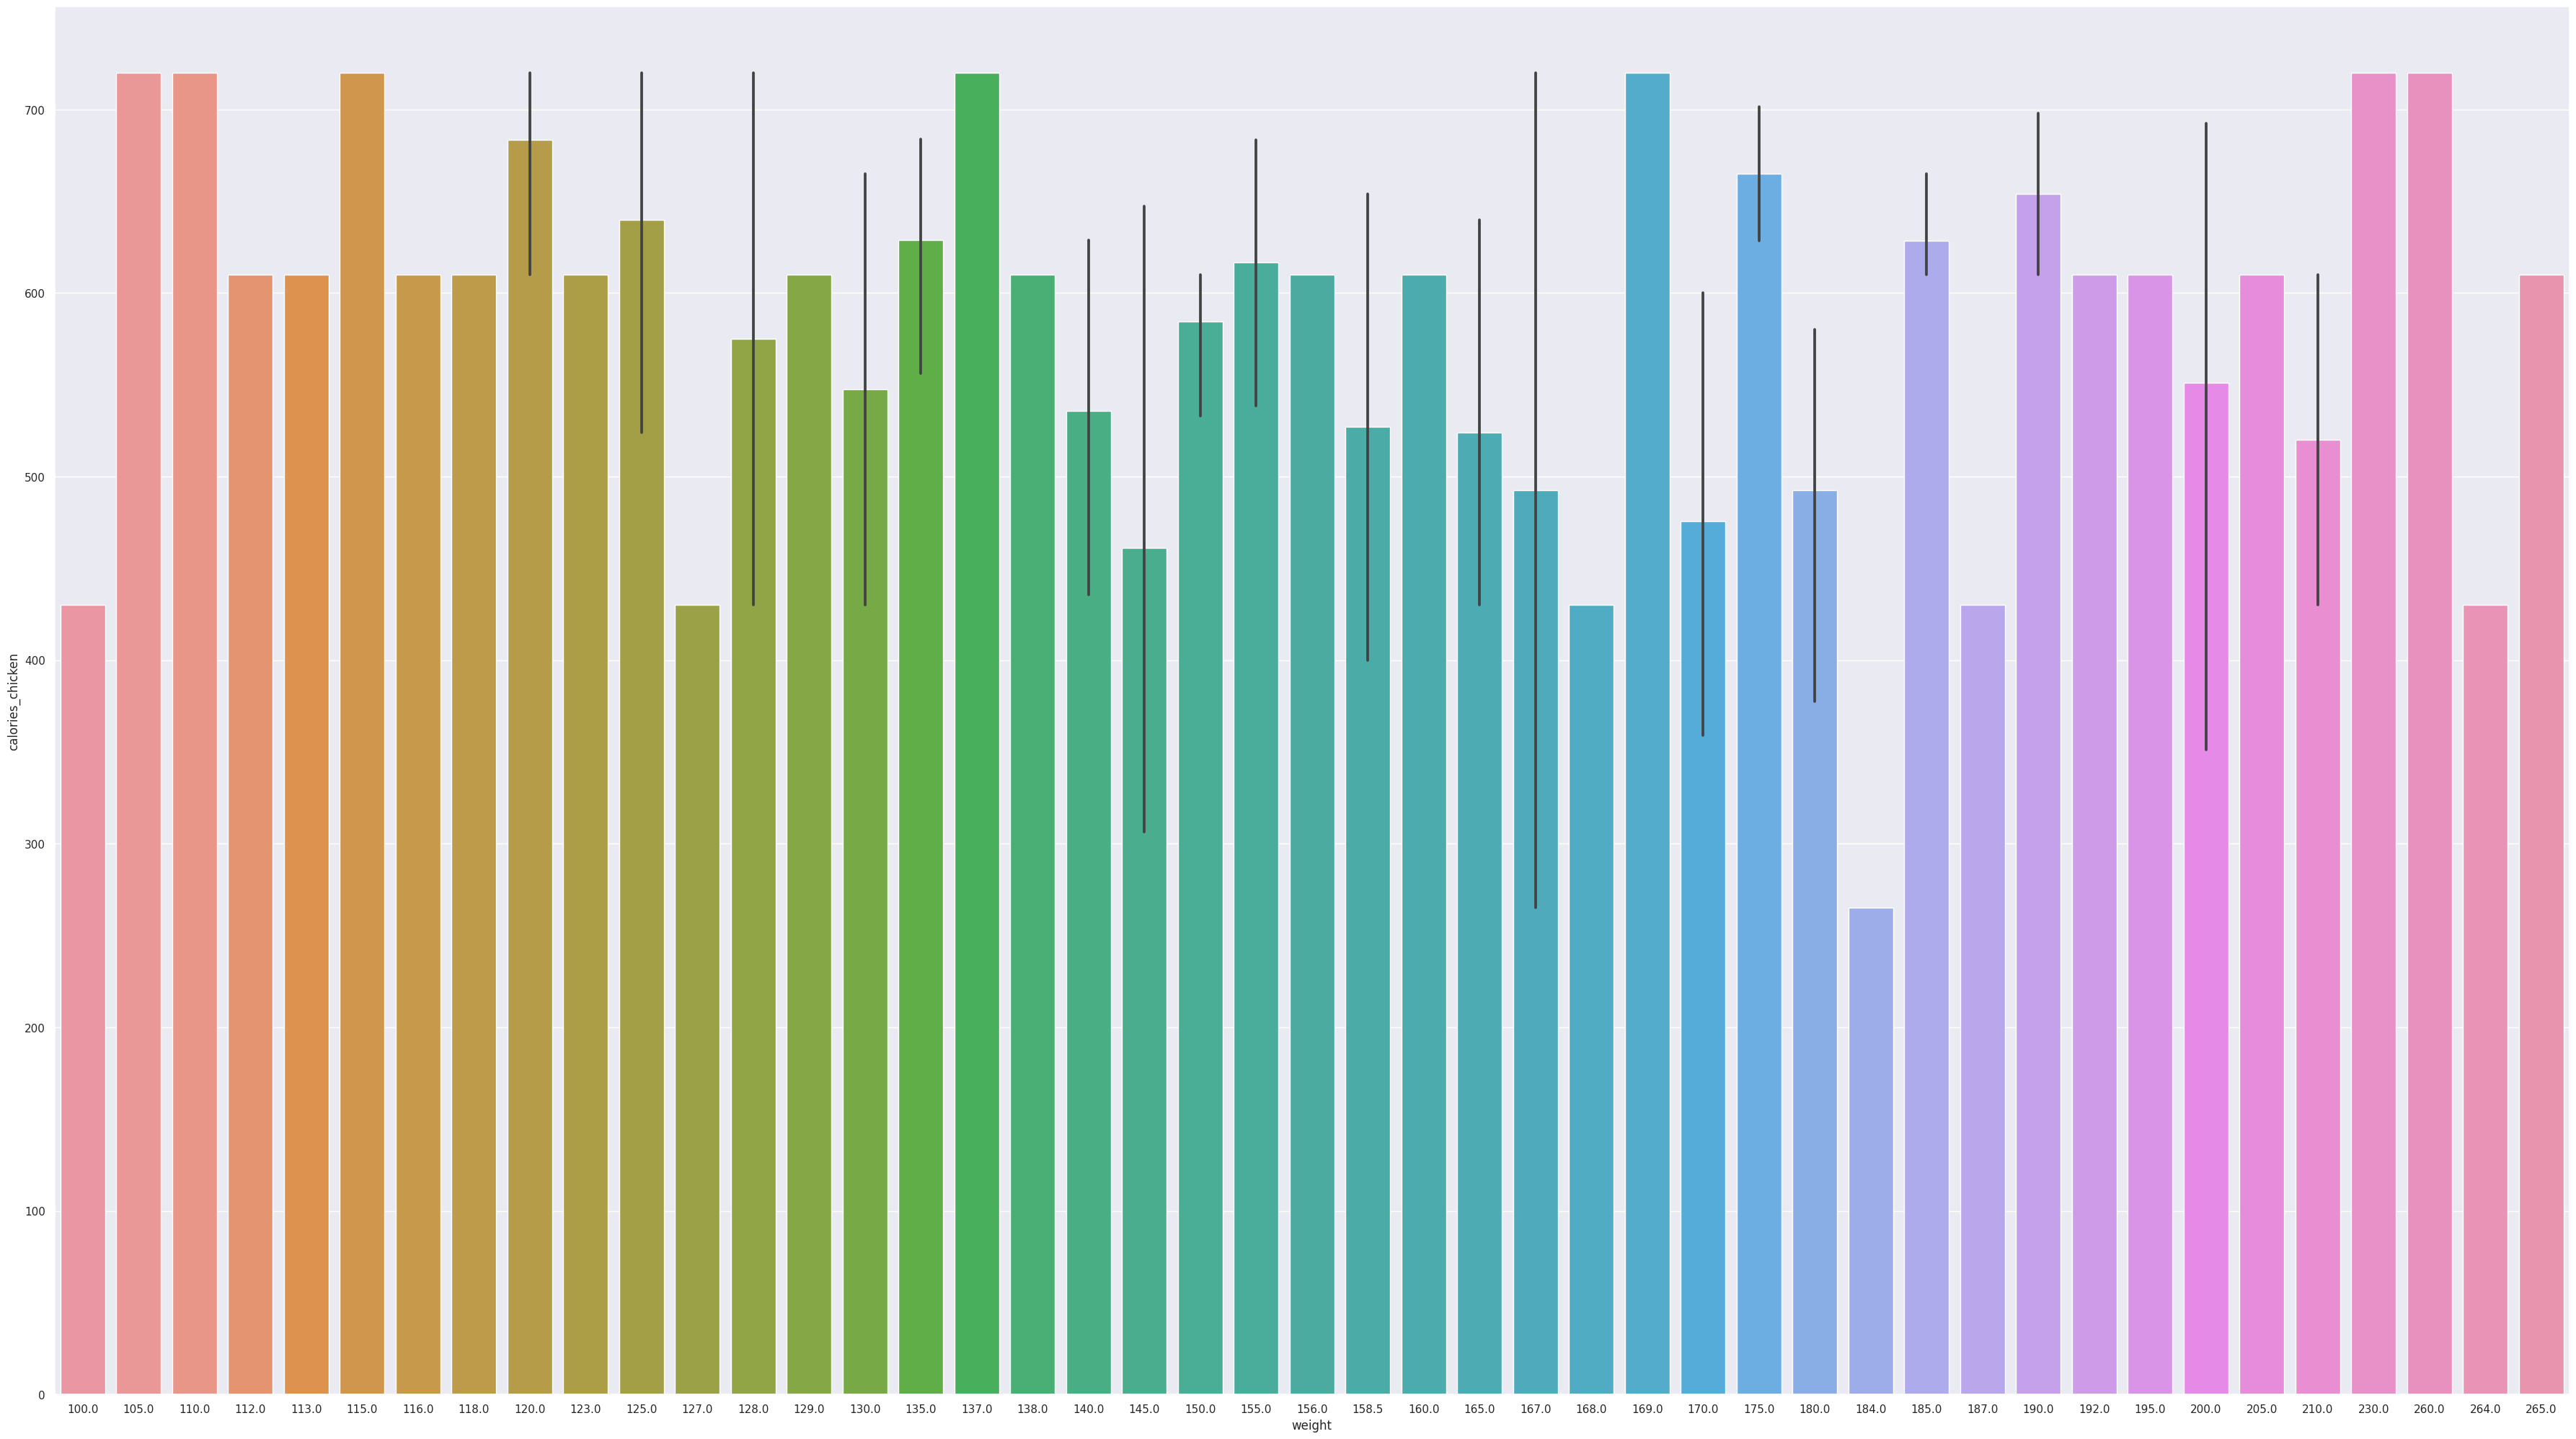

In [ ]:
Sorted_weights = df.sort_values(by='weight')
sns.set(rc={'figure.figsize':(45,25)})
sns.barplot(data = Sorted_weights,x='weight',y='calories_chicken')

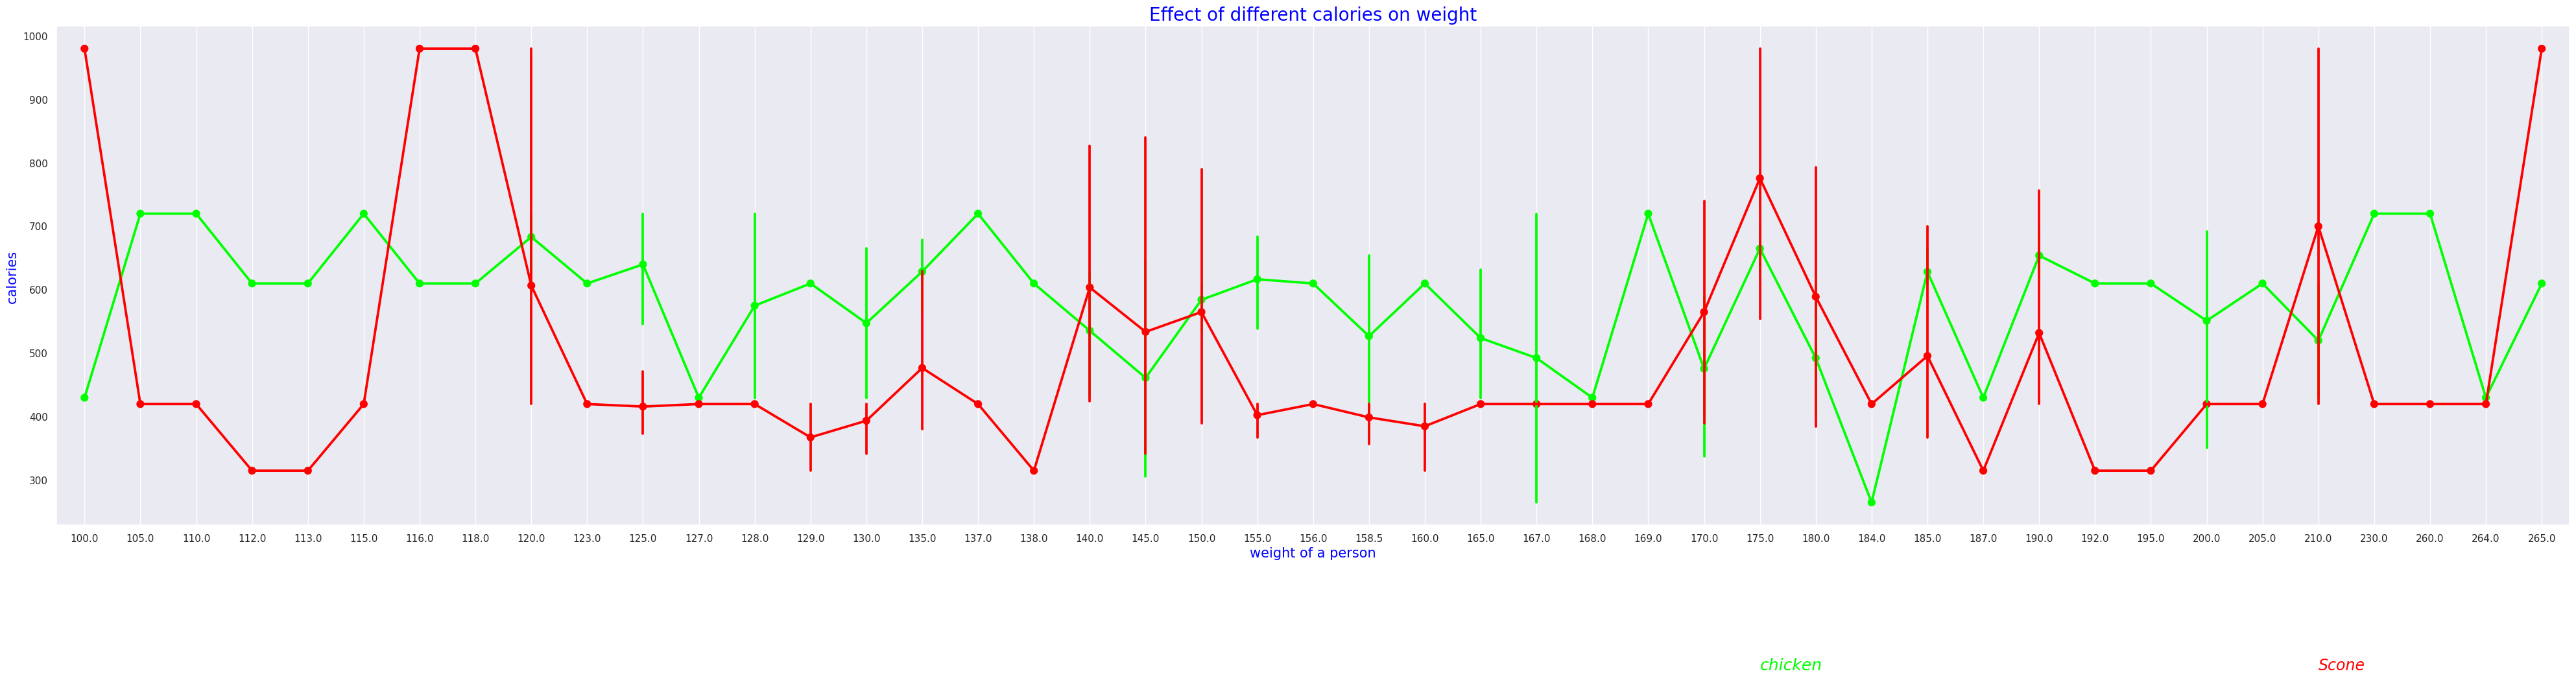

In [ ]:
f,ax1 = plt.subplots(figsize =(50,10))
sns.pointplot(x='weight',y='calories_chicken',data=Sorted_weights,color='lime')
sns.pointplot(x='weight',y='calories_scone',data=Sorted_weights,color='red')
plt.text(40,0.6,'Scone',color='red',fontsize = 17,style = 'italic')
plt.text(30,0.5,'chicken',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('weight of a person',fontsize = 15,color='blue')
plt.ylabel('calories ',fontsize = 15,color='blue')
plt.title('Effect of different calories on weight',fontsize = 20,color='blue')
plt.grid()

Previously we saw that how GPA has a relation with the calorie chicken and calorie scone but from the above graph we see that weight has no such relation with calorie chicken or calorie scone.
